
# Configuring a Workforce Project

In this example, a new Workforce Project will be configured to manage some construction work that needs to be performed in San Diego. We will add assignment types, workers, dispatchers, and app integrations.

* Note: This requires using ArcGIS API for Python version 1.6 or higher.

### Import ArcGIS API for Python
Import the `arcgis` library and some modules within it.

In [1]:
import arcgis
from arcgis.apps import workforce
from arcgis.gis import GIS


### Connect to the organization
Let's connect to our ArcGIS Online Organization.

In [2]:
gis = GIS("https://arcgis.com", "workforce_scripts")

Enter password: ········


### Fetch an Empty Workforce Project¶
Let's find the new Workforce Project.

In [3]:
item = gis.content.get("29f2f056e5e04ba383e59737b3f8b340")
project = workforce.Project(item)

### Add Assignment Types
Let's add three assignment types related to road construction.

In [4]:
fill_pothole = project.assignment_types.add(name="Fill in Pothole")
sidewalk_repair = project.assignment_types.add(name="Sidewalk Repair")
paint_crosswalk = project.assignment_types.add(name="Paint Crosswalk")

### Add Workers From an Existing Group
Let's add all of the construction workers that are already in an existing group.

<Group title:"Road Repair Crew" owner:workforce_scripts>
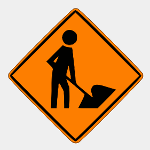

In [5]:
construction_crew = gis.groups.get("687cc3e68e8c4ef29dad20e8d6ebb9f5")
construction_crew

In [6]:
for username in construction_crew.get_members()["users"]:
    user = gis.users.get(username)
    project.workers.add(
        user_id=username,
        name=user.fullName,
        status="not_working",
        title="Construction Worker"
    )

### Add Dispatchers From an Existing Group
Let's add all of the supervisors from an existing group of construction supervisors.

<Group title:"Construction Supervisors" owner:workforce_scripts>
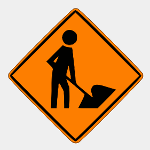

In [7]:
construction_supervisors = gis.groups.get("55edd0e5a7d549cc99dd588d4ffa70f3")
construction_supervisors

In [8]:
for username in construction_supervisors.get_members()["users"]:
    if username != "workforce_scripts":
        user = gis.users.get(username)
        project.dispatchers.add(
            user_id=username,
            name=user.fullName
        )

### Add Explorer Integration
Let's add an integration to open a specific map in Explorer for ArcGIS.


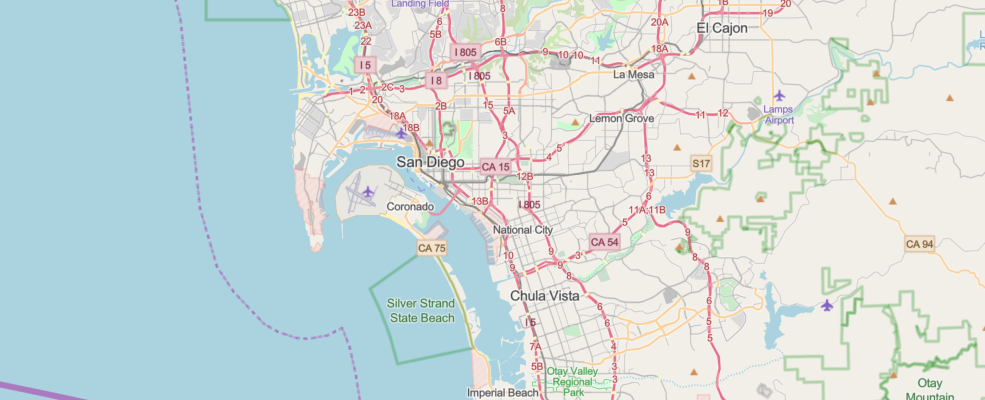

In [9]:
from arcgis.apps import build_explorer_url
from arcgis.mapping import WebMap

webmap = WebMap(gis.content.get("268512553bbb4332ba0a864cbf4a5423"))
webmap.item.share(groups=[project.group])
webmap

We're going to use the `build_explorer_url` function to create the url that Workforce will use. In order for the integration to show up correctly in Workforce Back Office, we'll use a `url_type` of "App".

In [10]:
url = build_explorer_url(
    webmap=webmap,
    center="${assignment.latitude},${assignment.longitude}",
    url_type="App",
    scale=9000
)

In [11]:
project.integrations.add("default-explorer", "Explorer At Assignment", url)

{'id': 'default-explorer',
 'prompt': 'Explorer At Assignment',
 'urlTemplate': 'arcgis-explorer://?itemID=268512553bbb4332ba0a864cbf4a5423&center=${assignment.latitude},${assignment.longitude}&scale=9000'}

### Add Waze Navigation Integration¶
Let's add a custom integration to allow workers to navigator to assignments using Waze.

In [12]:
waze_url = "https://waze.com/ul?ll=${assignment.latitude},${assignment.longitude}&navigate=yes"

In [13]:
project.integrations.add("waze-navigation", "Navigate Using Waze", waze_url)

{'id': 'waze-navigation',
 'prompt': 'Navigate Using Waze',
 'urlTemplate': 'https://waze.com/ul?ll=${assignment.latitude},${assignment.longitude}&navigate=yes'}